<div style="text-align: left; font-size: 16px;">
    <div style="text-align: left; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li>RMIT UNIVERSITY VIETNAM</li>
            <li>School of Science, Engineering and Technology (SSET)</li>
            <li>COSC2469 | COSC2722 – Algorithms and Analysis</li>
        </ul>
    </div>
</div>

<div style="text-align: center; font-size: 24px; margin-bottom: 5px; margin-top: 0px">
    <strong style="color: red;">Assessment 2: Group Project – Sudoku Solver</strong>
</div>

<div style="text-align: center; font-size: 20px; margin-bottom: -10px">
    <div style="text-align: center; display: inline-block; line-height: 2;">
        <ul style="list-style-type: none; padding: 0;">
            <li><strong>- Lecture:</strong> Dr. Tri Dang</li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s3914633 - Tran Dong Nghi
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4021263 - Chan Yong Park 
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4061665 - Le Hung 
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4104540 - Huynh Nguyen Minh Nhu	 
            </li>
            <li style="text-align: left; display: inline-block; padding-left: 30px;">
                s4054071 – Tran Hoang Nguyen
            </li>
            <li><strong>- Submission Due Date:</strong> 12.05.2025</li>
        </ul>
    </div>
</div>

<p style="text-align: center; font-size:16px; margin-left: 20px; line-height: 1.7; margin-top: -5px; margin-right: 30px;"><i>"I declare that in submitting all work for this assessment I have read, understood, and agree to the content and expectations of the <a href="https://www.rmit.edu.au/students/my-course/assessment-results/assessment" target="_blank">Assessment declaration</a>."</i></p>


# 1. IMPORT LIBRARY

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from matplotlib.ticker import MaxNLocator

# 2. IMPORT DATA

In [23]:
# Get the current working directory (where the notebook is located)
base_dir = Path(__file__).resolve().parent if '__file__' in globals() else Path().resolve()

# Go up two levels to reach the project root (from src/performance-analysis/)
project_root = base_dir.parent.parent

# Build the path to the CSV file using pathlib (cross-platform)
csv_path = project_root / "src" /"main" / "java" / "performance" / "sudokuIO" / "csvoutput.csv"

# Read the CSV file using pandas
raw_data = pd.read_csv(csv_path)

In [24]:
print('\n____________ Dataset info ____________')
print(raw_data.info())              
print('\n____________ Some first data examples ____________')
print(raw_data.head(5)) 
print('\n____________ Statistics of numeric features ____________')
print(raw_data.describe())    
print('\n____________ Get specific rows and cols ____________')     
print(raw_data.iloc[[0,1,45], [2, 5]] ) # Refer using column ID


____________ Dataset info ____________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Sudoku ID            204 non-null    int64 
 1   Algorithm            204 non-null    object
 2   Level                204 non-null    object
 3   Status               204 non-null    object
 4   Time Taken (ms)      204 non-null    int64 
 5   Memory Used (bytes)  204 non-null    int64 
dtypes: int64(3), object(3)
memory usage: 9.7+ KB
None

____________ Some first data examples ____________
   Sudoku ID              Algorithm Level  Status  Time Taken (ms)  \
0          1          Dancing Links  EASY  Solved             1561   
1          1           Backtracking  EASY  Solved              854   
2          1       Forward Checking  EASY  Solved             6106   
3          1  Backtracking with MRV  EASY  Solved              224   
4      

Algorithm
Backtracking              163
Dancing Links             684
Backtracking with MRV     812
Forward Checking        1,524
Name: Time Taken (ms), dtype: float64


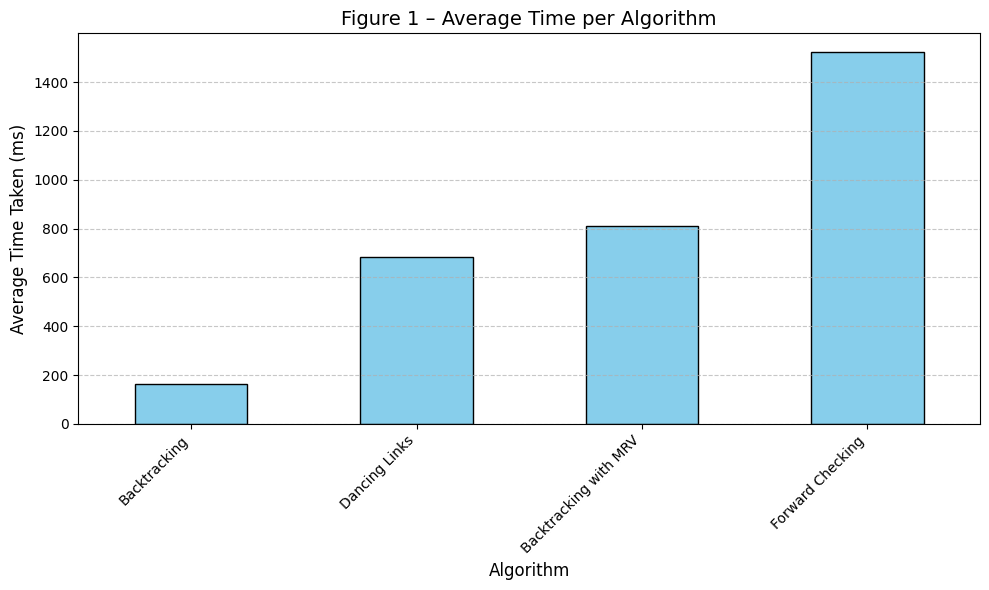

<Figure size 640x480 with 0 Axes>

In [29]:
# Calculate the average time taken by each algorithm
avg_time_per_algorithm = raw_data.groupby('Algorithm')['Time Taken (ms)'].mean().sort_values()

print(avg_time_per_algorithm)
# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_time_per_algorithm.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Figure 1 – Average Time per Algorithm', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Average Time Taken (ms)', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the plot to the 'visualization_output' folder
output_path = 'visualization_outputs/average_time_per_algorithm.png'
plt.savefig(output_path, dpi=300)

Algorithm
Backtracking                   38
Backtracking with MRV     192,920
Dancing Links             377,545
Forward Checking        2,178,754
Name: Memory Used (bytes), dtype: float64


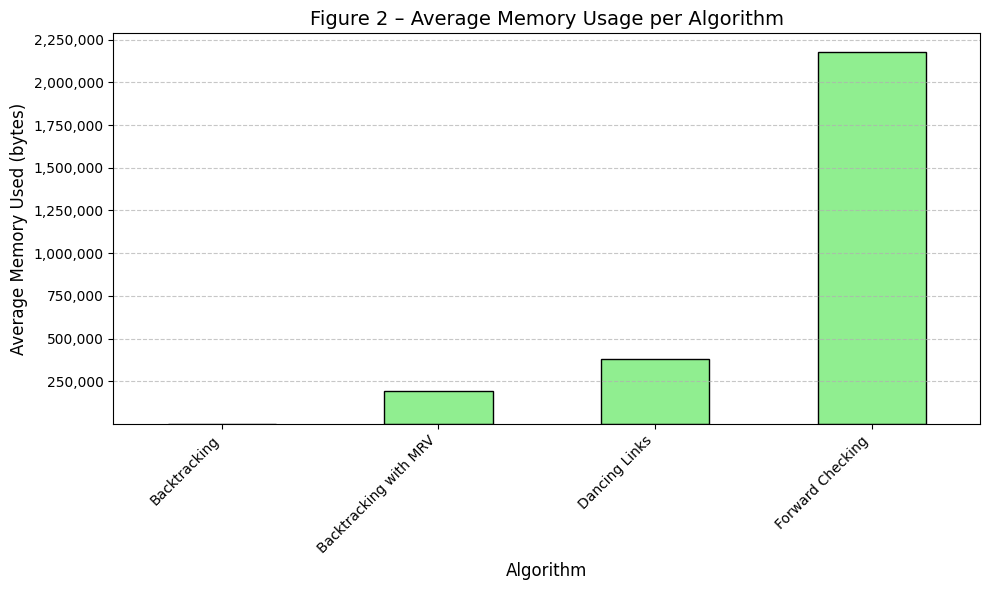

<Figure size 640x480 with 0 Axes>

In [30]:
# Set pandas to display float numbers in non-scientific notation
pd.options.display.float_format = '{:,.0f}'.format

# Calculate the average memory usage per algorithm
avg_memory_per_algorithm = raw_data.groupby('Algorithm')['Memory Used (bytes)'].mean().sort_values()

# Print the average memory usage with regular formatting
print(avg_memory_per_algorithm)

# Plot the bar chart
plt.figure(figsize=(10, 6))
avg_memory_per_algorithm.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Figure 2 – Average Memory Usage per Algorithm', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Average Memory Used (bytes)', fontsize=12)

# Set y-axis to show numbers without scientific notation
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))  # Make y-axis integers
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'))  # Format y-axis without scientific notation

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the plot to the 'visualization_output' folder
output_path = 'visualization_outputs/average_memory_usage_per_algorithm.png'
plt.savefig(output_path, dpi=300)

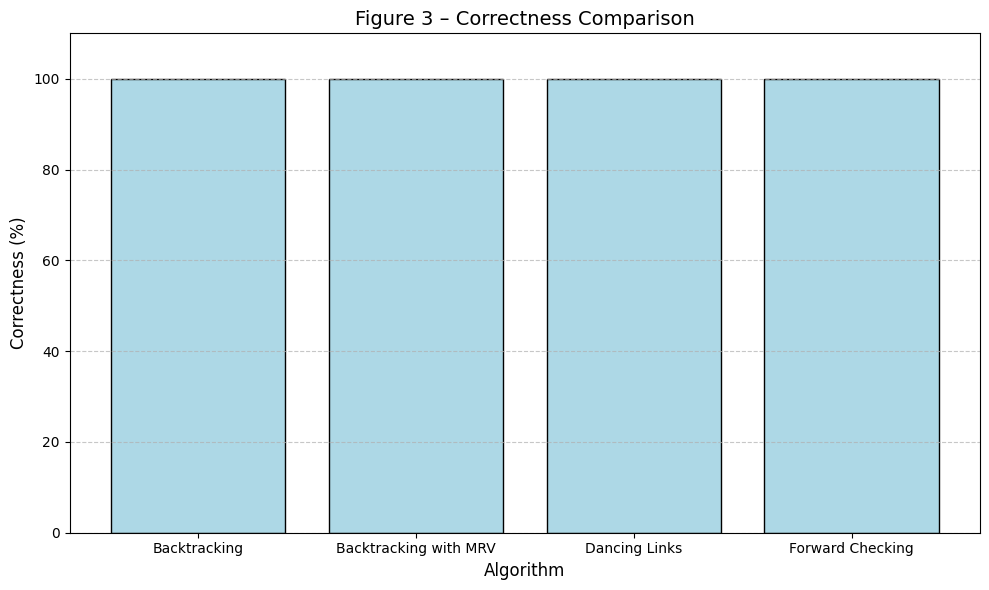

In [ ]:
# Data for the Bar chart
correctness_series = raw_data.groupby('Algorithm')['Status'].apply(lambda x: (x == 'Solved').mean() * 100)
algorithms = correctness_series.index.tolist()
correctness = correctness_series.values.tolist()

# Bar chart
plt.figure(figsize=(10, 6))
plt.bar(algorithms, correctness, color='lightblue', edgecolor='black')
plt.title('Figure 3 – Correctness Comparison', fontsize=14)
plt.xlabel('Algorithm', fontsize=12)
plt.ylabel('Correctness (%)', fontsize=12)
plt.ylim(0, 110)  # Set limit to make the chart look a little more interesting
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Save the plot to the 'visualization_output' folder
output_path = 'visualization_outputs/correctness_comparison.png'
plt.savefig(output_path, dpi=300)

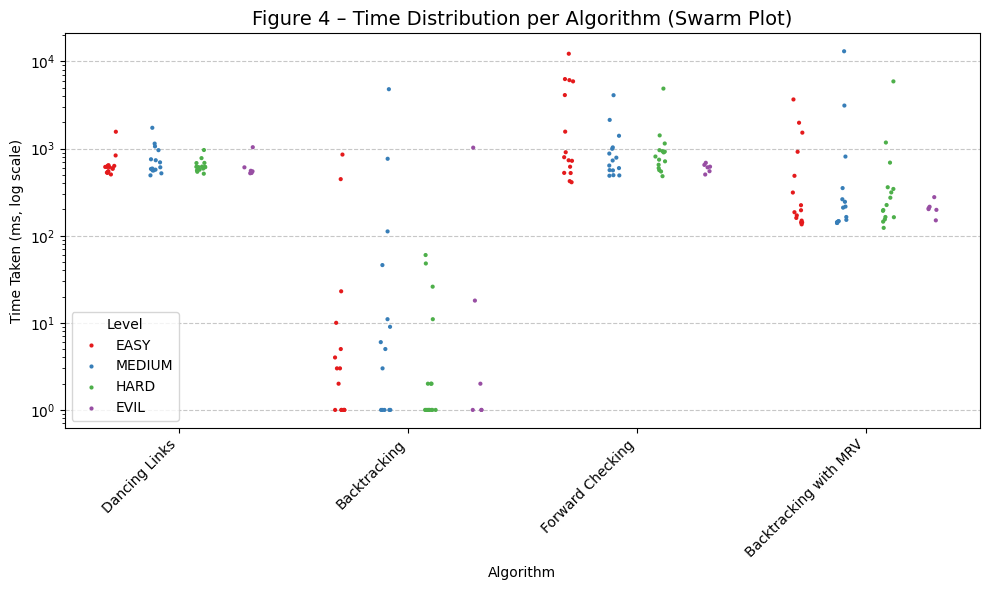

In [61]:
plt.figure(figsize=(10, 6))
sns.stripplot(
    data=raw_data,
    x='Algorithm',               # Group by Algorithm
    y='Time Taken (ms)',         # Plot Time Taken
    hue='Level',                 # Add color differentiation for Level
    palette='Set1',              # Clear color palette
    size=3,
    jitter=True,
    dodge=True,                  # Separate each level's data
    legend=True
)
plt.yscale('log')               # Log scale for better time distribution visualization
plt.title('Figure 4 – Time Distribution per Algorithm (Swarm Plot)', fontsize=14)
plt.xlabel('Algorithm')
plt.ylabel('Time Taken (ms, log scale)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


Figure 5 – Correlation Metric: Correctness, Solving Time, Memory Used by Algorithm: A metric visualizing the correctness, the average time taken, the avg memory taken for each algorithm 

In [88]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Prepare the grouped data (Without Level)
grouped = raw_data.groupby(['Algorithm']).agg({
    'Status': lambda x: (x == 'Solved').mean() * 100,  # Correctness %
    'Time Taken (ms)': 'mean',                         # Average time
    'Memory Used (bytes)': 'mean'                      # Average memory
}).reset_index()

# Convert memory to MB
grouped['Memory Used (MB)'] = grouped['Memory Used (bytes)'] / (1024 * 1024)

# Round values for display
grouped['Correctness (%)'] = grouped['Status'].round(1)
grouped['Time Taken (ms)'] = grouped['Time Taken (ms)'].round(1)
grouped['Memory Used (MB)'] = grouped['Memory Used (MB)'].round(1)

# Create columns for each metric with Algorithm name
metrics = ['Correctness (%)', 'Time Taken (ms)', 'Memory Used (MB)']
columns = [f'{algo} {metric}' for algo in grouped['Algorithm'] for metric in metrics]

# Reshape the data so we can create a correlation matrix
data = []
for algo in grouped['Algorithm']:
    row = []
    for metric in metrics:
        row.append(grouped[grouped['Algorithm'] == algo][metric].values[0])
    data.append(row)

# Create a DataFrame from reshaped data
heatmap_data = pd.DataFrame(data, columns=columns, index=columns)

# Plot heatmap
plt.figure(figsize=(16, 8))
sns.heatmap(
    heatmap_data,
    annot=True,
    fmt='.1f',
    cmap='RdYlGn',
    cbar_kws={'label': 'Values'},
    linewidths=0.5
)

# Add title and axis labels
plt.title('Figure 5 – Correlation Metric: Correctness, Solving Time, Memory Used by Algorithm', fontsize=14)
plt.xlabel('Metrics')
plt.ylabel('Metrics')

plt.tight_layout()
plt.show()


ValueError: 12 columns passed, passed data had 3 columns